## ARITMA

### Librerias

In [516]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_squared_error

### Data

In [517]:
df_aerolinea = pd.read_csv("/home/daniel/Drive WLS/Cursos/machine-learning/series_de_tiempo/Data/AirPassengers.csv", index_col="Month")
df_aerolinea= df_aerolinea.rename(columns={"#Passengers": "Passengers"})
df_aerolinea.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


### Transformación

In [518]:
df_aerolinea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [519]:
df_aerolinea.isnull().sum()

Passengers    0
dtype: int64

In [520]:
df_aerolinea.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [521]:
df_aerolinea.index = pd.to_datetime(df_aerolinea.index)

In [522]:
df_aerolinea.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [523]:
df_aerolinea.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Analisis ETE

<Axes: xlabel='Month'>

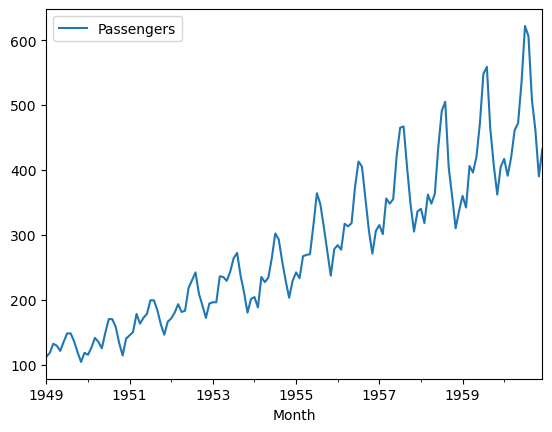

In [524]:
df_aerolinea.plot()

In [525]:
ete = seasonal_decompose(df_aerolinea["Passengers"], model="aditive")
ete

<Axes: xlabel='Month'>

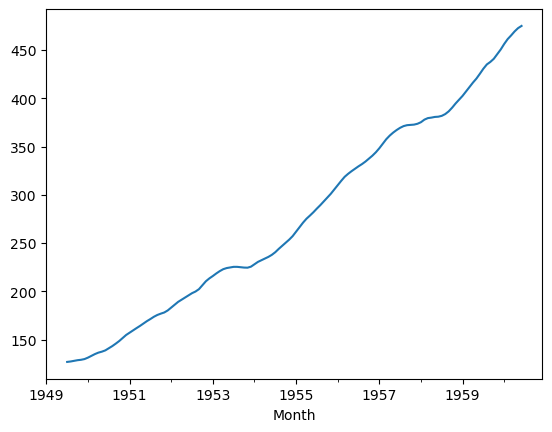

In [526]:
ete.trend.plot() # tendencia del modelo

<Axes: xlabel='Month'>

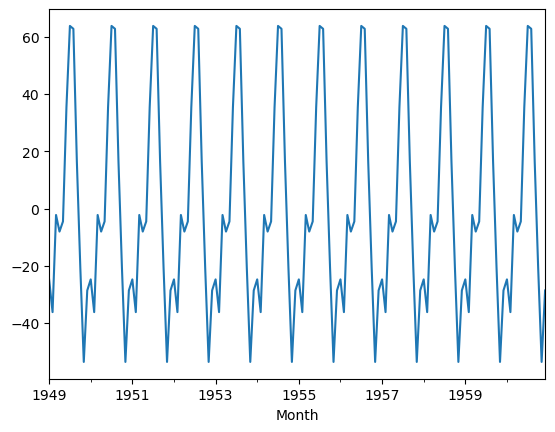

In [527]:
ete.seasonal.plot() #Estacionalidad del modelo

<Axes: xlabel='Month'>

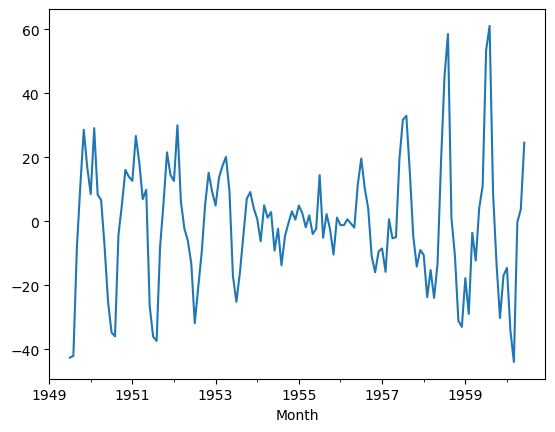

In [528]:
ete.resid.plot() #Errores del modelo

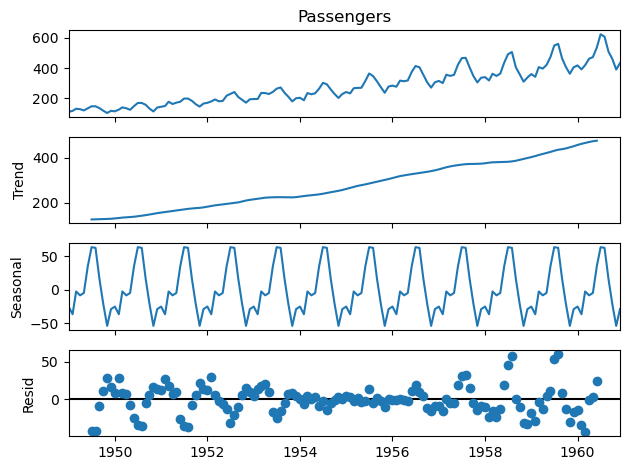

In [529]:
grafica_model_aditive=ete.plot()

In [530]:
ete_multi = seasonal_decompose(df_aerolinea["Passengers"], model="multiplicative")
ete_multi

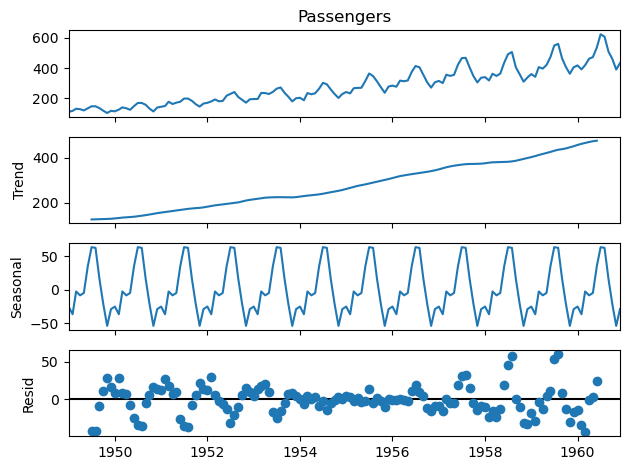

In [531]:
grafica_model_multiplicative=ete.plot()

### Prueba de estacionalidad 

<Axes: xlabel='Month'>

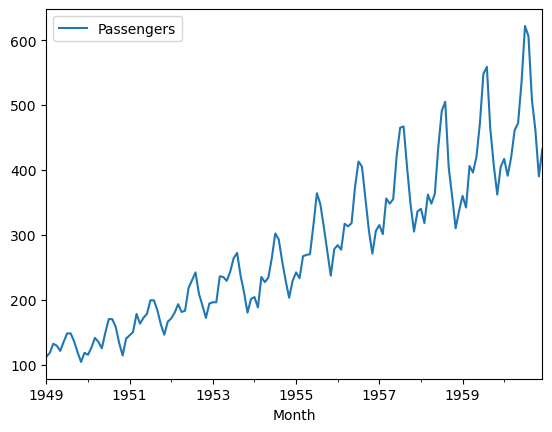

In [532]:
df_aerolinea.plot()

In [533]:
df_aerolinea.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [534]:
df_aerolinea.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [535]:
serie_de_tiempo = df_aerolinea["Passengers"]

In [536]:
type(serie_de_tiempo)

pandas.core.series.Series

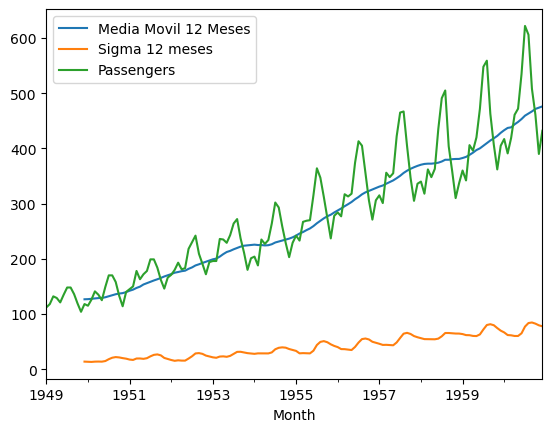

In [537]:
serie_de_tiempo.rolling(12).mean().plot(label="Media Movil 12 Meses")
serie_de_tiempo.rolling(12).std().plot(label="Sigma 12 meses")
serie_de_tiempo.plot()
plt.legend()
plt.show()

#### Prueba de Dickey Fuller Aumentada (ADF)

La Prueba de Dickey-Fuller Aumentada (ADF, Augmented Dickey-Fuller Test) es una prueba estadística utilizada para determinar si una serie temporal es estacionaria o si tiene una raíz unitaria, lo que indicaría que es no estacionaria.

¿Qué significa que una serie sea estacionaria?
Una serie temporal es estacionaria si sus propiedades estadísticas (como la media, la varianza y la autocorrelación) se mantienen constantes en el tiempo. Esto es importante porque muchos modelos de series temporales, como ARIMA, suponen que los datos son estacionarios.

Ejemplo de series estacionarias y no estacionarias:
Estacionaria: Si una serie oscila alrededor de una media constante con variabilidad estable en el tiempo.
No estacionaria: Si la serie tiene tendencia (crece o decrece con el tiempo) o una varianza cambiante.
¿Cómo funciona la Prueba de Dickey-Fuller?
La prueba ADF evalúa la hipótesis nula (H₀) de que la serie tiene una raíz unitaria, es decir, que no es estacionaria.

Hipótesis nula (H₀): La serie tiene una raíz unitaria (es decir, no estacionaria).

Hipótesis alternativa (H₁): La serie es estacionaria.

Si el p-valor es menor a un umbral (por lo general 0.05), se rechaza H₀, indicando que la serie es estacionaria.

#### Estadistico ADF

In [538]:
tes_adf= adfuller(df_aerolinea["Passengers"])
tes_adf

(0.815368879206051,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

Interpretación de los resultados:

Estadístico ADF: Es el valor de la prueba estadística. Cuanto más negativo sea, mayor será la evidencia de estacionariedad.

p-valor: Si es menor que 0.05, rechazamos la hipótesis nula y concluimos que la serie es estacionaria.

Valores críticos: Son los valores de referencia a distintos niveles de confianza (1%, 5%, 10%).

Decisión:

Si p-valor < 0.05 → Rechazamos H₀ → La serie es estacionaria.

Si p-valor ≥ 0.05 → No rechazamos H₀ → La serie no es estacionaria.


#### Valor P

In [539]:
p_value = tes_adf[1]
print("El valor p es "+ str(p_value))

El valor p es 0.991880243437641


#### Validación de Hipotesis

In [540]:
alpha = 0.05

In [541]:
if p_value < alpha:
    print("Rechazamos H₀ → La serie es estacionaria.")
else:
    print(" No rechazamos H₀ → La serie no es estacionaria.")


 No rechazamos H₀ → La serie no es estacionaria.


### Diferencias

In [542]:
df_aerolinea.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [543]:
df_aerolinea["Primera Diferencia"]=df_aerolinea["Passengers"]-df_aerolinea["Passengers"].shift(1)

In [544]:
df_aerolinea.head()

,Passengers,Primera Diferencia
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


<Axes: xlabel='Month'>

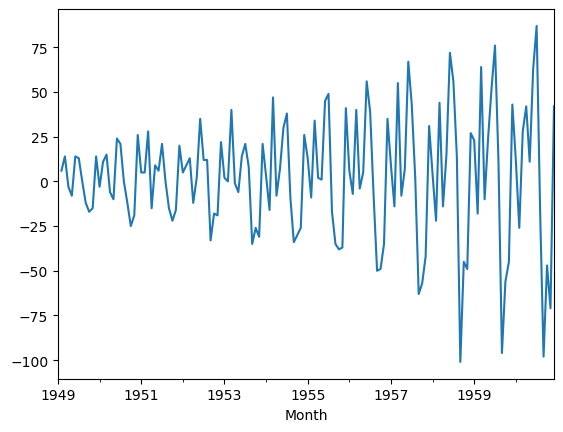

In [545]:
df_aerolinea["Primera Diferencia"].plot()

In [546]:
tes_adf_dif_1 = adfuller(df_aerolinea["Primera Diferencia"].dropna())
tes_adf_dif_1

(-2.8292668241699874,
 0.05421329028382711,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [547]:
p_value_dif_1 = tes_adf_dif_1[1]
p_value_dif_1

0.05421329028382711

In [548]:
if p_value_dif_1 < alpha:
    print("Rechazamos H₀ → La serie es estacionaria.")
else:
    print(" No rechazamos H₀ → La serie no es estacionaria.")

 No rechazamos H₀ → La serie no es estacionaria.


In [549]:
df_aerolinea.head()

,Passengers,Primera Diferencia
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [550]:
df_aerolinea["Segunda Diferencia"]=df_aerolinea["Primera Diferencia"]-df_aerolinea["Primera Diferencia"].shift(1)

In [551]:
df_aerolinea.head()

,Passengers,Primera Diferencia,Segunda Diferencia
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


<Axes: xlabel='Month'>

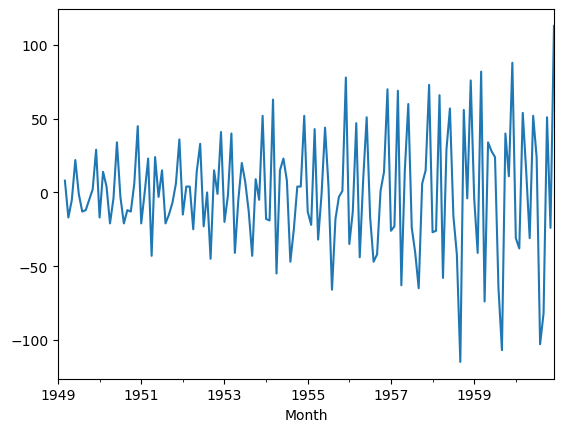

In [552]:
df_aerolinea["Segunda Diferencia"].plot()

In [553]:
tes_adf_dif_2 = adfuller(df_aerolinea["Segunda Diferencia"].dropna())
tes_adf_dif_2

(-16.384231542468537,
 2.7328918500140445e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275602)

In [554]:
p_value_dif_2 = tes_adf_dif_2[1]
p_value_dif_2

2.7328918500140445e-29

In [555]:
if p_value_dif_2 < alpha:
    print("Rechazamos H₀ → La serie es estacionaria.")
else:
    print(" No rechazamos H₀ → La serie no es estacionaria.")

Rechazamos H₀ → La serie es estacionaria.


#### Diferencia con Estacionalidad

In [556]:
df_aerolinea["Diferencia Estacionalidad"] = df_aerolinea["Passengers"]-df_aerolinea["Passengers"].shift(12)

In [557]:
df_aerolinea.head(20)

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


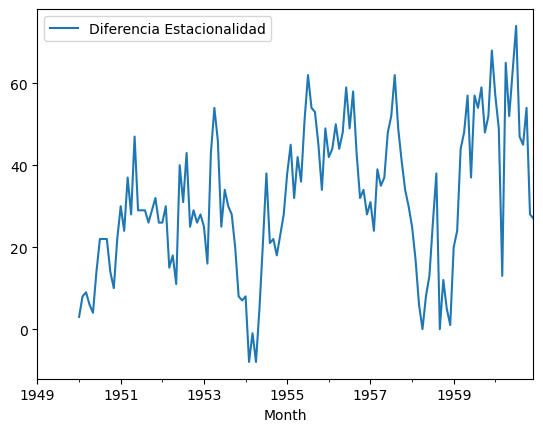

In [558]:
df_aerolinea["Diferencia Estacionalidad"].plot()
plt.legend()
plt.show()

In [559]:
tes_adf_dif_est= adfuller(df_aerolinea["Diferencia Estacionalidad"].dropna())
tes_adf_dif_est

(-3.3830207264924796,
 0.011551493085515008,
 1,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 919.527129208137)

In [560]:
p_value_dif_est = tes_adf_dif_est[1]
p_value_dif_est

0.011551493085515008

In [561]:
if p_value_dif_est < alpha:
    print("Rechazamos H₀ → La serie es estacionaria.")
else:
    print(" No rechazamos H₀ → La serie no es estacionaria.")

Rechazamos H₀ → La serie es estacionaria.


In [562]:
df_aerolinea["Primera Diferencia Estacionalidad"] = df_aerolinea["Primera Diferencia"]-df_aerolinea["Primera Diferencia"].shift(12)

In [563]:
df_aerolinea.head(24)

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
1949-06-01,135,14.0,22.0,NaN,NaN
1949-07-01,148,13.0,-1.0,NaN,NaN
1949-08-01,148,0.0,-13.0,NaN,NaN
1949-09-01,136,-12.0,-12.0,NaN,NaN


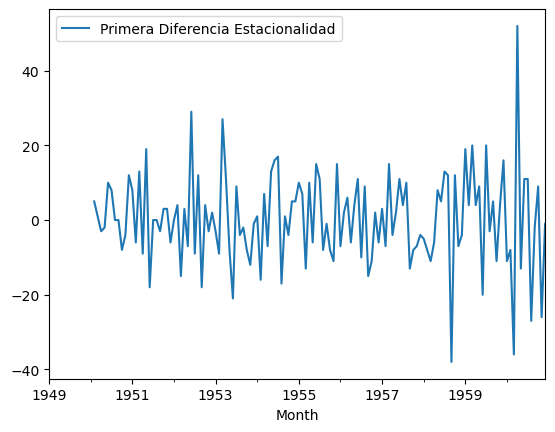

In [564]:
df_aerolinea["Primera Diferencia Estacionalidad"].plot()
plt.legend()
plt.show()

In [565]:
tes_adf_prim_dif_est= adfuller(df_aerolinea["Primera Diferencia Estacionalidad"].dropna())
tes_adf_prim_dif_est

(-15.595618083746338,
 1.856511600123444e-28,
 0,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 919.8428088960275)

### Partir la Base de Datos

In [566]:
df_aerolinea.head()

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [567]:
df_aerolinea.describe()

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
count,144.000000,143.000000,142.000000,132.000000,131.000000
mean,280.298611,2.237762,0.253521,31.772727,0.183206
std,119.966317,33.754282,39.855668,17.654699,12.356749
min,104.000000,-101.000000,-115.000000,-8.000000,-38.000000
25%,180.000000,-16.000000,-22.750000,21.000000,-7.500000
50%,265.500000,4.000000,-1.000000,30.000000,0.000000
75%,360.500000,22.500000,23.750000,45.250000,9.000000
max,622.000000,87.000000,113.000000,74.000000,52.000000


In [568]:
train = df_aerolinea[0:132]
train

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1959-08-01,559,11.0,-65.0,54.0,-3.0
1959-09-01,463,-96.0,-107.0,59.0,5.0
1959-10-01,407,-56.0,40.0,48.0,-11.0


In [569]:
tes = df_aerolinea[132:]
tes

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Month,,,,,
1960-01-01,417,12.0,-31.0,57.0,-11.0
1960-02-01,391,-26.0,-38.0,49.0,-8.0
1960-03-01,419,28.0,54.0,13.0,-36.0
1960-04-01,461,42.0,14.0,65.0,52.0
1960-05-01,472,11.0,-31.0,52.0,-13.0
1960-06-01,535,63.0,52.0,63.0,11.0
1960-07-01,622,87.0,24.0,74.0,11.0
1960-08-01,606,-16.0,-103.0,47.0,-27.0
1960-09-01,508,-98.0,-82.0,45.0,-2.0


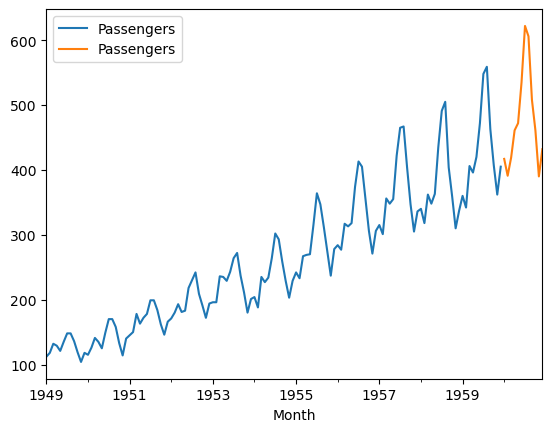

In [570]:
train["Passengers"].plot()
tes["Passengers"].plot()
plt.legend()
plt.show()

### Grafico ACF y PACF

In [571]:
train.tail()

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Month,,,,,
1959-08-01,559,11.0,-65.0,54.0,-3.0
1959-09-01,463,-96.0,-107.0,59.0,5.0
1959-10-01,407,-56.0,40.0,48.0,-11.0
1959-11-01,362,-45.0,11.0,52.0,4.0
1959-12-01,405,43.0,88.0,68.0,16.0


In [572]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1949-01-01 to 1959-12-01
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Passengers                         132 non-null    int64  
 1   Primera Diferencia                 131 non-null    float64
 2   Segunda Diferencia                 130 non-null    float64
 3   Diferencia Estacionalidad          120 non-null    float64
 4   Primera Diferencia Estacionalidad  119 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.2 KB


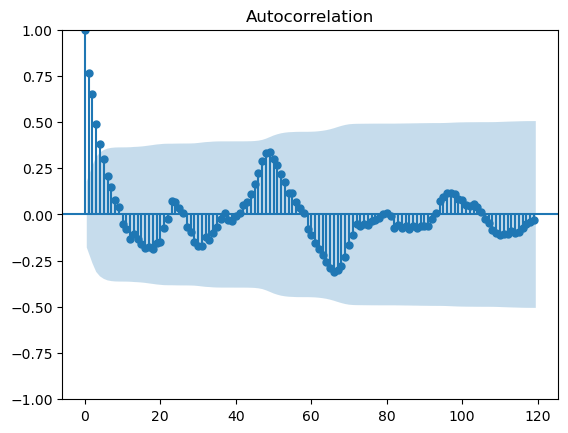

In [573]:
acf=plot_acf(train["Diferencia Estacionalidad"].dropna(), lags=119)

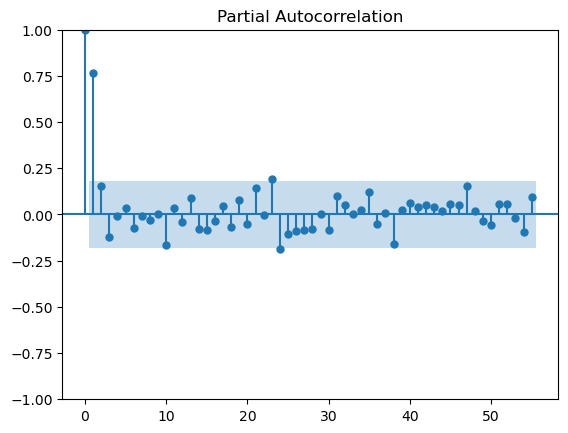

In [574]:
pacf=plot_pacf(train["Diferencia Estacionalidad"].dropna(), lags=55)

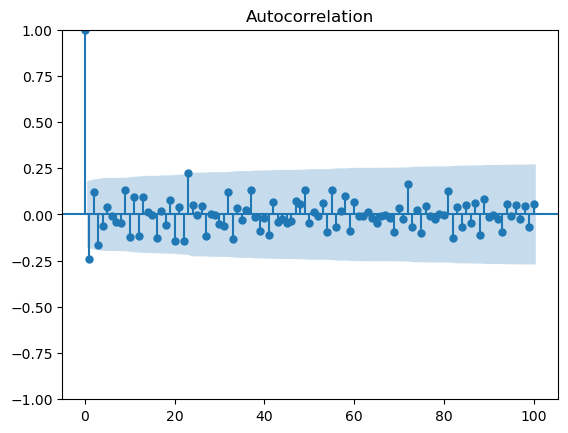

In [575]:
acf=plot_acf(train["Primera Diferencia Estacionalidad"].dropna(), lags=100)

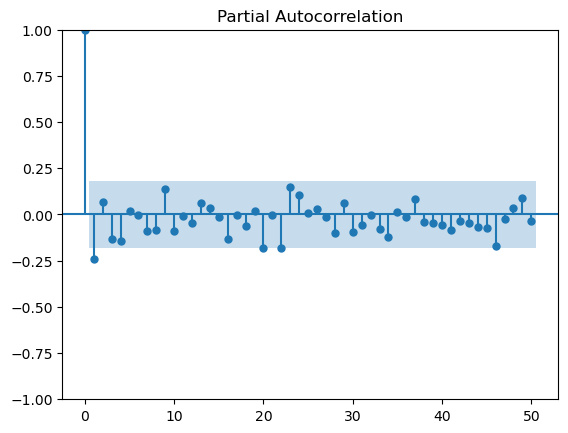

In [576]:
pacf=plot_pacf(train["Primera Diferencia Estacionalidad"].dropna(), lags=50)

#### Determinacion de componentes

Se va trabajar con la primera diferenciacion ya que evidencio estacionalidad en los graficos y en los estadisticos

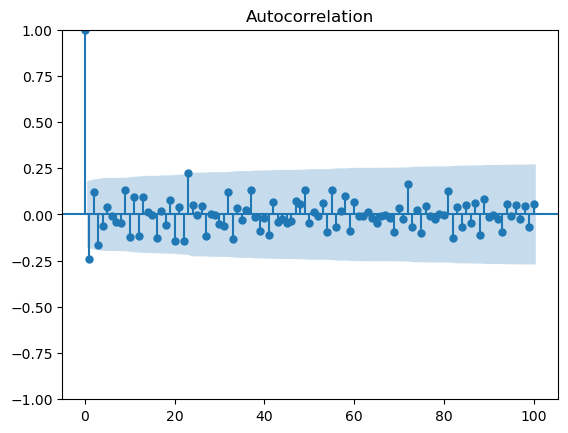

In [577]:
acf=plot_acf(train["Primera Diferencia Estacionalidad"].dropna(), lags=100)

Movil Averange (MA), parametros q y Q

El parámetro q (orden del modelo MA) representa el número de rezagos significativos en la parte de "media móvil" (Moving Average, MA) del modelo ARIMA.

🔹 Regla general: q es el número de rezagos donde la ACF es significativamente diferente de 0 (antes de que se corte abruptamente o se vuelva insignificante).

Si la ACF muestra un corte brusco en el rezago q, significa que un modelo MA(q) puede capturar la relación en la serie. 

R/= Para el caso de estudio q puede ser 1 o 2

Para modelos SARIMA, el parámetro Q representa la parte de media móvil estacional (Seasonal MA).

🔹 Pasos para determinar Q:

Mirar la ACF en los rezagos estacionales (ej., si los datos son mensuales, revisar en lag=12, 24, 36...).
Si en esos rezagos hay valores significativamente altos, el orden estacional Q se elige como el número de lags donde la ACF aún es significativa.
Ejemplo: Si la ACF muestra valores altos en lag=12 y 24 (con datos mensuales), podríamos considerar un modelo con Q=2.

R/= Para el caso Q es igual a cero

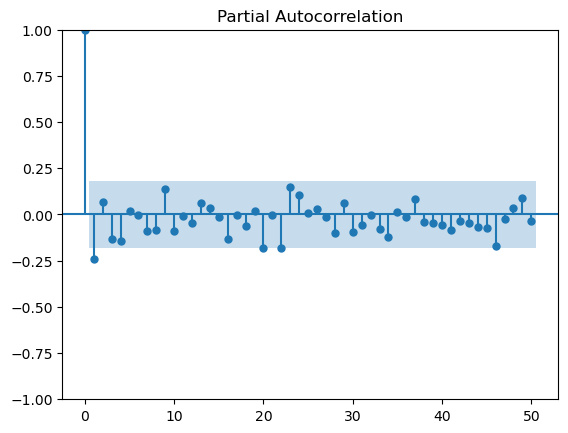

In [578]:
pacf=plot_pacf(train["Primera Diferencia Estacionalidad"].dropna(), lags=50)

El PACF (Partial Autocorrelation Function, Función de Autocorrelación Parcial)

El parámetro p en ARIMA representa el número de rezagos en la parte autorregresiva (AR) del modelo.

Regla general: p es el número de rezagos donde la PACF es significativamente diferente de 0 (antes de que se corte abruptamente o se vuelva insignificante).
Si la PACF se corta bruscamente en el rezago p, significa que un modelo AR(p) puede capturar la relación en la serie.

R/= Para el caso p puede ser 1 o 2

Para modelos SARIMA, el parámetro P representa la parte autorregresiva estacional (Seasonal AR).

🔹 Pasos para determinar P:

Mirar la PACF en los rezagos estacionales (ej., si los datos son mensuales, revisar en lag=12, 24, 36...).
Si en esos rezagos hay valores significativamente altos, el orden estacional P se elige como el número de lags donde la PACF aún es significativa.
Ejemplo: Si la PACF muestra valores altos en lag=12, podríamos considerar un modelo con P=1.

R/= Para este caso P es 0

#### Modelo S-ARIMA

Fórmula del Modelo SARIMA
El modelo SARIMA (Seasonal Autoregressive Integrated Moving Average) es una extensión del modelo ARIMA que incorpora componentes estacionales. Su notación es:

SARIMA(p,d,q)×(P,D,Q,s)

Donde:

p,d,q → Parámetros del modelo ARIMA:

p: Orden autorregresivo (AR).

d: Diferenciación necesaria para hacer la serie estacionaria.

q: Orden de la media móvil (MA).

P,D,Q,s → Parámetros del componente estacional:

P: Orden autorregresivo estacional.

D: Diferenciación estacional.

Q: Orden de la media móvil estacional.

s: Período estacional (ejemplo: 12 para datos mensuales, 4 para trimestrales).

In [579]:
train.head()

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [580]:
modelo = sm.tsa.statespace.SARIMAX(train["Passengers"], order = (2,1,2), seasonal_order = (0,1,0,12))

#order = (2,1,2), seasonal_order = (0,1,0,12)) RMSE =17
#order = (1,1,1), seasonal_order = (0,1,0,12)) RMSE = 24.8
#order = (1,1,2), seasonal_order = (0,1,0,12) RMSE = 24.9
#order = (2,1,1), seasonal_order = (0,1,0,12) RMSE = 24.8

/home/daniel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/daniel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [581]:
resultados = modelo.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38945D+00    |proj g|=  4.59203D-02



At iterate    5    f=  3.38506D+00    |proj g|=  1.65178D-02

At iterate   10    f=  3.37982D+00    |proj g|=  2.49450D-02

At iterate   15    f=  3.37402D+00    |proj g|=  8.88650D-03

At iterate   20    f=  3.37364D+00    |proj g|=  6.14144D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   2.388D-06   3.374D+00
  F =   3.3736361377366983     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [582]:
print(resultados.summary())

                                      SARIMAX Results                                      
Dep. Variable:                          Passengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 12)   Log Likelihood                -445.320
Date:                             Sun, 06 Apr 2025   AIC                            900.640
Time:                                     15:50:05   BIC                            914.536
Sample:                                 01-01-1949   HQIC                           906.283
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2589      0.366      0.708      0.479      -0.458       0.976
ar.L2          0.5173      

In [583]:
resultados.resid

Month
1949-01-01    112.000000
1949-02-01      6.001678
1949-03-01     13.999650
1949-04-01     -2.998907
1949-05-01     -8.000229
                 ...    
1959-08-01      5.499383
1959-09-01      5.488792
1959-10-01     -5.435220
1959-11-01      3.536885
1959-12-01     20.353747
Length: 132, dtype: float64

<Axes: xlabel='Month'>

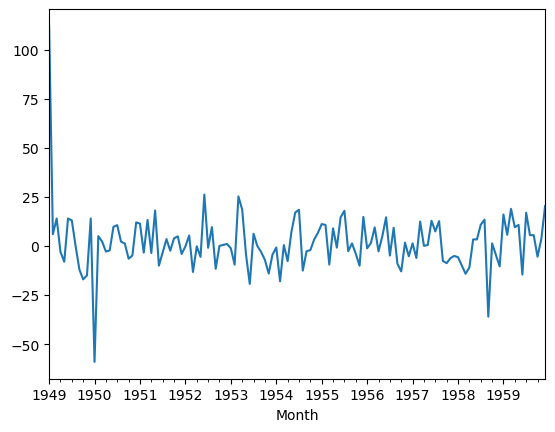

In [584]:
resultados.resid.plot()

# Pronostico

In [585]:
train.head()

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [586]:
train["Pronostico"]= resultados.predict()

/tmp/ipykernel_65500/3083488665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Pronostico"]= resultados.predict()


In [587]:
train

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad,Pronostico
Month,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,0.000000
1949-02-01,118,6.0,NaN,NaN,NaN,111.998322
1949-03-01,132,14.0,8.0,NaN,NaN,118.000350
1949-04-01,129,-3.0,-17.0,NaN,NaN,131.998907
1949-05-01,121,-8.0,-5.0,NaN,NaN,129.000229
...,...,...,...,...,...,...
1959-08-01,559,11.0,-65.0,54.0,-3.0,553.500617
1959-09-01,463,-96.0,-107.0,59.0,5.0,457.511208
1959-10-01,407,-56.0,40.0,48.0,-11.0,412.435220


<Axes: xlabel='Month'>

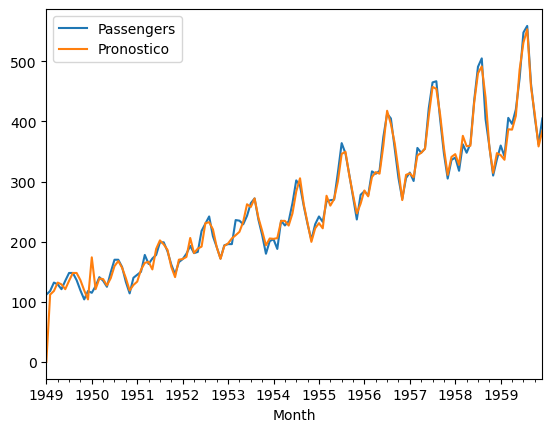

In [588]:
train[["Passengers", "Pronostico"]].plot()

In [589]:
fechasfuturas = [train.index[-1] + DateOffset(months=x) for x in range(1,13)]

In [590]:
fechasfuturas

[Timestamp('1960-01-01 00:00:00'),
 Timestamp('1960-02-01 00:00:00'),
 Timestamp('1960-03-01 00:00:00'),
 Timestamp('1960-04-01 00:00:00'),
 Timestamp('1960-05-01 00:00:00'),
 Timestamp('1960-06-01 00:00:00'),
 Timestamp('1960-07-01 00:00:00'),
 Timestamp('1960-08-01 00:00:00'),
 Timestamp('1960-09-01 00:00:00'),
 Timestamp('1960-10-01 00:00:00'),
 Timestamp('1960-11-01 00:00:00'),
 Timestamp('1960-12-01 00:00:00')]

In [591]:
df_futuras = pd.DataFrame(index=fechasfuturas, columns=train.columns)
df_futuras

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad,Pronostico
1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1960-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1960-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1960-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1960-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1960-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1960-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1960-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1960-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1960-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [592]:
df_nuevo = pd.concat([train,df_futuras])
df_nuevo

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad,Pronostico
1949-01-01,112,NaN,NaN,NaN,NaN,0.000000
1949-02-01,118,6.0,NaN,NaN,NaN,111.998322
1949-03-01,132,14.0,8.0,NaN,NaN,118.000350
1949-04-01,129,-3.0,-17.0,NaN,NaN,131.998907
1949-05-01,121,-8.0,-5.0,NaN,NaN,129.000229
...,...,...,...,...,...,...
1960-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1960-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1960-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1960-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [593]:
df_nuevo["Pronostico"]=resultados.predict(star=132,end=144)
df_nuevo

/home/daniel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['star']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad,Pronostico
1949-01-01,112,NaN,NaN,NaN,NaN,0.000000
1949-02-01,118,6.0,NaN,NaN,NaN,111.998322
1949-03-01,132,14.0,8.0,NaN,NaN,118.000350
1949-04-01,129,-3.0,-17.0,NaN,NaN,131.998907
1949-05-01,121,-8.0,-5.0,NaN,NaN,129.000229
...,...,...,...,...,...,...
1960-08-01,NaN,NaN,NaN,NaN,NaN,605.770062
1960-09-01,NaN,NaN,NaN,NaN,NaN,508.549611
1960-10-01,NaN,NaN,NaN,NaN,NaN,451.563744
1960-11-01,NaN,NaN,NaN,NaN,NaN,405.677213


<Axes: >

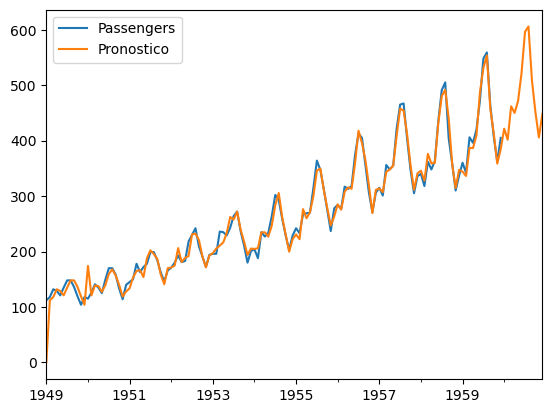

In [594]:
df_nuevo[["Passengers", "Pronostico"]].plot()

### Validacion del Modelo 

In [595]:
df_pronostico = pd.DataFrame(index=fechasfuturas)
df_pronostico

""
1960-01-01
1960-02-01
1960-03-01
1960-04-01
1960-05-01
1960-06-01
1960-07-01
1960-08-01
1960-09-01
1960-10-01


In [596]:
df_pronostico["pronostico"]= df_nuevo["Pronostico"][132:144]
df_pronostico

,pronostico
1960-01-01,421.515495
1960-02-01,401.678751
1960-03-01,461.848912
1960-04-01,449.907384
1960-05-01,471.423655
1960-06-01,521.776380
1960-07-01,596.065153
1960-08-01,605.770062
1960-09-01,508.549611
1960-10-01,451.563744


In [597]:
tes

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad
Month,,,,,
1960-01-01,417,12.0,-31.0,57.0,-11.0
1960-02-01,391,-26.0,-38.0,49.0,-8.0
1960-03-01,419,28.0,54.0,13.0,-36.0
1960-04-01,461,42.0,14.0,65.0,52.0
1960-05-01,472,11.0,-31.0,52.0,-13.0
1960-06-01,535,63.0,52.0,63.0,11.0
1960-07-01,622,87.0,24.0,74.0,11.0
1960-08-01,606,-16.0,-103.0,47.0,-27.0
1960-09-01,508,-98.0,-82.0,45.0,-2.0


In [598]:
tes = tes.merge(df_pronostico, left_index=True, right_index=True)
tes

,Passengers,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia Estacionalidad,pronostico
Month,,,,,,
1960-01-01,417,12.0,-31.0,57.0,-11.0,421.515495
1960-02-01,391,-26.0,-38.0,49.0,-8.0,401.678751
1960-03-01,419,28.0,54.0,13.0,-36.0,461.848912
1960-04-01,461,42.0,14.0,65.0,52.0,449.907384
1960-05-01,472,11.0,-31.0,52.0,-13.0,471.423655
1960-06-01,535,63.0,52.0,63.0,11.0,521.776380
1960-07-01,622,87.0,24.0,74.0,11.0,596.065153
1960-08-01,606,-16.0,-103.0,47.0,-27.0,605.770062
1960-09-01,508,-98.0,-82.0,45.0,-2.0,508.549611


<Axes: xlabel='Month'>

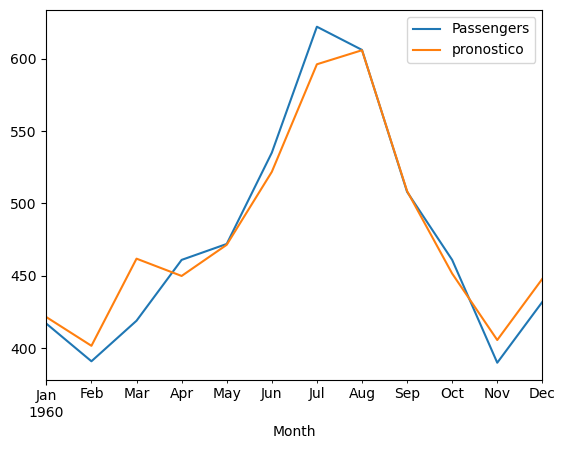

In [599]:
tes[["Passengers", "pronostico"]].plot()

### RMSE Error

In [600]:
rmse = np.sqrt(mean_squared_error(tes["Passengers"], tes["pronostico"]))
rmse

17.152497269556964